In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.environ.setdefault('GLUE_SETTINGS_MODULE', 'settings')

'settings'

In [3]:
import jbb.model1 as nw
import settings16 as settings

In [4]:
batch_size = settings.BATCH_SIZE
samplerate = settings.SAMPLERATE

In [5]:
x = tf.placeholder(tf.float32, [1, samplerate])
cls = tf.placeholder(tf.int32, 1)

In [6]:
with tf.variable_scope('network'):
    net = nw.conv_net(x, cls, None)

conv1:  Tensor("network/glu_conv1_1/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1:  Tensor("network/glu_conv1_2/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv2:  Tensor("network/glu_conv2_1/mul:0", shape=(1, 16384, 1, 8), dtype=float32)
conv2:  Tensor("network/glu_conv2_2/mul:0", shape=(1, 16384, 1, 8), dtype=float32)
conv2:  Tensor("network/MaxPool2D/MaxPool:0", shape=(1, 8192, 1, 8), dtype=float32)
embedded: Tensor("network/embedding/concat:0", shape=(1, 8192, 1, 10), dtype=float32)
conv3:  Tensor("network/glu_conv3_2/mul:0", shape=(1, 8192, 1, 16), dtype=float32)
d2sp:  Tensor("network/d2s1/Reshape:0", shape=(1, 16384, 1, 8), dtype=float32)
conv4:  Tensor("network/glu_conv4_3/mul:0", shape=(1, 16384, 1, 64), dtype=float32)
conv5:  Tensor("network/conv5/Relu:0", shape=(1, 16384, 1, 256), dtype=float32)
out:  Tensor("network/output/Reshape:0", shape=(1, 16384, 256), dtype=float32)


In [7]:
saver = tf.train.Saver()

In [8]:
sess = tf.InteractiveSession()

In [9]:
saver.restore(sess, tf.train.latest_checkpoint('logs','emb_mid_r3.checkpoint'))

INFO:tensorflow:Restoring parameters from /home/s123094/FlowFairy/examples/sine_fix/logs/emb_mid_r3.ckpt-113000


In [10]:
coll = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
c1uw = coll[0]

In [11]:
i=0
for i, v in enumerate(coll):
    print(i,v)

0 <tf.Variable 'network/conv1_1_unit/weights:0' shape=(256, 1, 1, 4) dtype=float32_ref>
1 <tf.Variable 'network/conv1_1_unit/BatchNorm/beta:0' shape=(4,) dtype=float32_ref>
2 <tf.Variable 'network/conv1_1_gate/weights:0' shape=(256, 1, 1, 4) dtype=float32_ref>
3 <tf.Variable 'network/conv1_1_gate/BatchNorm/beta:0' shape=(4,) dtype=float32_ref>
4 <tf.Variable 'network/conv1_2_unit/weights:0' shape=(256, 1, 4, 4) dtype=float32_ref>
5 <tf.Variable 'network/conv1_2_unit/biases:0' shape=(4,) dtype=float32_ref>
6 <tf.Variable 'network/conv1_2_gate/weights:0' shape=(256, 1, 4, 4) dtype=float32_ref>
7 <tf.Variable 'network/conv1_2_gate/biases:0' shape=(4,) dtype=float32_ref>
8 <tf.Variable 'network/conv2_1_unit/weights:0' shape=(128, 1, 4, 8) dtype=float32_ref>
9 <tf.Variable 'network/conv2_1_unit/biases:0' shape=(8,) dtype=float32_ref>
10 <tf.Variable 'network/conv2_1_gate/weights:0' shape=(128, 1, 4, 8) dtype=float32_ref>
11 <tf.Variable 'network/conv2_1_gate/biases:0' shape=(8,) dtype=float

<tf.Variable 'network/embedding/embedding:0' shape=(200, 2) dtype=float32_ref>


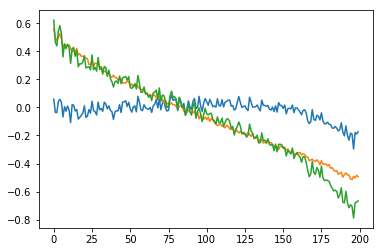

In [12]:
embedding = coll[16]
print(embedding)
plt.plot(embedding.eval()[:,0])
plt.plot(embedding.eval()[:,1])
plt.plot(embedding.eval().sum(1))
plt.show()

In [13]:
def classify(val):
    val = (val-np.min(val))/(np.max(val)-np.min(val))
    return np.floor(val*255)

def getid(frq):
    limits = settings.FREQUENCY_LIMIT
    count = settings.CLASS_COUNT
    step = (limits[1] - limits[0]) // count
    return (frq-limits[0])//step

def getfrq(fid):
    limits = settings.FREQUENCY_LIMIT
    count = settings.CLASS_COUNT
    step = (limits[1] - limits[0]) // count
    return limits[0] + step*fid

In [14]:
with tf.variable_scope('network', reuse=True):
    tnet = nw.conv_net(x, cls, None, is_training=True)

conv1:  Tensor("network_1/glu_conv1_1/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1:  Tensor("network_1/glu_conv1_2/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv2:  Tensor("network_1/glu_conv2_1/mul:0", shape=(1, 16384, 1, 8), dtype=float32)
conv2:  Tensor("network_1/glu_conv2_2/mul:0", shape=(1, 16384, 1, 8), dtype=float32)
conv2:  Tensor("network_1/MaxPool2D/MaxPool:0", shape=(1, 8192, 1, 8), dtype=float32)
embedded: Tensor("network_1/embedding/concat:0", shape=(1, 8192, 1, 10), dtype=float32)
conv3:  Tensor("network_1/glu_conv3_2/mul:0", shape=(1, 8192, 1, 16), dtype=float32)
d2sp:  Tensor("network_1/d2s1/Reshape:0", shape=(1, 16384, 1, 8), dtype=float32)
conv4:  Tensor("network_1/glu_conv4_3/mul:0", shape=(1, 16384, 1, 64), dtype=float32)
conv5:  Tensor("network_1/conv5/Relu:0", shape=(1, 16384, 1, 256), dtype=float32)
out:  Tensor("network_1/output/Reshape:0", shape=(1, 16384, 256), dtype=float32)


In [15]:
pred = tf.argmax(net, 2)

In [16]:
tpred = tf.argmax(tnet, 2)

In [30]:
frqid = 10
frq = getfrq(frqid)
print(frq)

bfrq = getfrq(100)
print(bfrq)

myrange = np.arange(2**14) * 2 * np.pi / 2**14
mysine = np.sin(myrange * frq)
mysine2 = np.sin(myrange * bfrq)
noise = np.random.uniform(-0.5, 0.5, samplerate)

#plt.plot(mysine)
#plt.show()

320
500


In [31]:
b = np.array([mysine+mysine2+noise])
y = np.array([frqid])
run = sess.run(pred, feed_dict={x: b, cls: y})

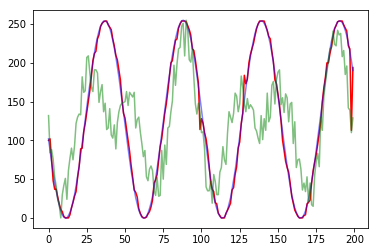

In [32]:
#plt.plot(classify(b[0][1000:2000]))
plt.plot(run[0][1000:1200], 'r')
plt.plot(classify(mysine)[1000:1200], 'b', alpha=0.5)
plt.plot(classify(b[0][1000:1200]), 'g', alpha=0.5)
plt.show()

# print(tf.train.Saver.last_checkpoints)
print(saver.last_checkpoints)
l = tf.train.latest_checkpoint('logs', latest_filename='GGLU_e2_256.checkpoint')
step = l[l.rfind('-')+1:]
print(step)

In [20]:
(150-120)/3


10.0